In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
import matplotlib
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

In [4]:
busan = pd.read_csv('./부산광역시_지표.csv')
busan

,id,구군,면적(km²),공공체육시설,초등학교,지방세 징수(백만원),의료기관,저소득층(가구),저소득층(인구),세대수,한국인(남),한국인(여),외국인(남),외국인(여),출생(명),사망(명),혼인(건),이혼(건),범죄발생,흉악범죄,폭력범죄,CCTV수,가로등수
0,1,중구,2.830,17,4,"100,363",141,139,280,"23,160","20,557","21,353","1,347",815,112,409,163,91,5553,93,674,376,1740
1,2,서구,13.980,74,11,"73,444",148,672,1281,"52,786","52,627","55,602","1,314",807,386,999,391,227,3979,58,466,376,2779
2,3,동구,9.870,65,7,"119,496",172,532,1129,"44,657","43,327","44,838","1,089","1,223",334,848,369,188,5899,89,781,649,3654
3,4,영도구,14.200,52,14,"63,242",146,667,1289,"54,859","57,629","59,082","1,177",740,346,1158,366,259,3534,54,569,501,3240
4,5,부산진구,29.670,225,32,"343,404",799,1176,2402,"166,865","173,446","184,434","1,275","1,889",1695,2450,1475,684,17066,469,2748,1005,6481
5,6,동래구,16.630,36,22,"227,601",469,784,1530,"112,136","132,295","138,952",427,826,1291,1538,1058,498,8381,137,1193,687,4350
6,7,남구,26.820,74,21,"232,160",355,720,1392,"117,397","134,519","139,961","3,148","3,224",1203,1726,1045,502,8431,138,1046,3171,4486
7,8,북구,39.370,67,27,"130,947",360,1220,2602,"120,273","144,229","146,903","1,220","1,352",1468,1704,1084,538,8106,126,1342,661,5438
8,9,해운대구,51.470,117,32,"449,970",654,1406,2881,"168,650","195,960","210,142","2,539","2,652",1948,2335,1471,724,14386,267,1732,570,11063
9,10,사하구,41.770,59,26,"203,760",416,1366,2859,"138,790","160,101","160,903","2,998","1,949",1526,2093,1337,761,8826,176,1222,1801,6798


In [5]:
busan.columns

Index(['id', '구군', '면적(km²)', '공공체육시설', '초등학교', '지방세 징수(백만원)', '의료기관',
       '저소득층(가구)', '저소득층(인구)', '세대수', '한국인(남)', '한국인(여)', '외국인(남)', '외국인(여)',
       '출생(명)', '사망(명)', '혼인(건)', '이혼(건)', '범죄발생', '흉악범죄', '폭력범죄', 'CCTV수',
       '가로등수'],
      dtype='object')

In [6]:
busan['지방세 징수(백만원)'] = pd.to_numeric(busan['지방세 징수(백만원)'].str.replace(',', ''))
busan['세대수'] = pd.to_numeric(busan['세대수'].str.replace(',', ''))
busan['한국인(남)'] = pd.to_numeric(busan['한국인(남)'].str.replace(',', ''))
busan['한국인(여)'] = pd.to_numeric(busan['한국인(여)'].str.replace(',', ''))
busan['외국인(남)'] = pd.to_numeric(busan['외국인(남)'].str.replace(',', ''))
busan['외국인(여)'] = pd.to_numeric(busan['외국인(여)'].str.replace(',', ''))

In [7]:
busan['인구'] = busan['한국인(남)'] + busan['한국인(여)'] + busan['외국인(남)'] + busan['외국인(여)']
busan['인구/CCTV수'] = busan['인구'] / busan['CCTV수']
busan['면적/CCTV수'] = busan['면적(km²)'] / busan['CCTV수']
busan['인구/가로등수'] = busan['인구'] / busan['가로등수']
busan['면적/가로등수'] = busan['면적(km²)'] / busan['가로등수']
busan['인구/면적'] = busan['인구'] / busan['면적(km²)']
busan['외국인/인구'] = (busan['외국인(남)'] + busan['외국인(여)']) / busan['인구']
busan['저소득층/인구'] = busan['저소득층(인구)'] / busan['인구']
busan['저소득층/세대수'] = busan['저소득층(가구)'] / busan['세대수']
busan['여성/인구'] = (busan['한국인(여)'] + busan['외국인(여)']) / busan['인구']
busan['강력범죄'] = busan['흉악범죄'] + busan['폭력범죄']
busan['범죄/인구'] = busan['범죄발생'] / busan['인구']
busan['강력범죄/범죄'] = busan['강력범죄'] / busan['범죄발생']

In [8]:
busan.columns

Index(['id', '구군', '면적(km²)', '공공체육시설', '초등학교', '지방세 징수(백만원)', '의료기관',
       '저소득층(가구)', '저소득층(인구)', '세대수', '한국인(남)', '한국인(여)', '외국인(남)', '외국인(여)',
       '출생(명)', '사망(명)', '혼인(건)', '이혼(건)', '범죄발생', '흉악범죄', '폭력범죄', 'CCTV수',
       '가로등수', '인구', '인구/CCTV수', '면적/CCTV수', '인구/가로등수', '면적/가로등수', '인구/면적',
       '외국인/인구', '저소득층/인구', '저소득층/세대수', '여성/인구', '강력범죄', '범죄/인구', '강력범죄/범죄'],
      dtype='object')

In [62]:
busan.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16.000,8.500,4.761,1.000,4.750,8.500,12.250,16.000
면적(km²),16.000,48.129,62.003,2.830,13.510,28.245,44.195,218.300
공공체육시설,16.000,90.500,59.826,17.000,51.750,70.500,117.250,225.000
초등학교,16.000,19.000,8.287,4.000,13.250,21.000,23.000,32.000
지방세 징수(백만원),16.000,209659.750,119312.881,63242.000,128084.250,180042.500,236692.000,462338.000
의료기관,16.000,324.000,195.056,97.000,162.250,330.500,374.000,799.000
저소득층(가구),16.000,776.812,361.392,139.000,633.250,728.500,915.000,1406.000
저소득층(인구),16.000,1592.500,758.246,280.000,1243.000,1461.000,1869.500,2881.000
세대수,16.000,93619.250,42991.682,23160.000,54577.000,93496.000,118116.000,168650.000
한국인(남),16.000,104713.562,50140.616,20557.000,64643.750,105769.500,136946.500,195960.000


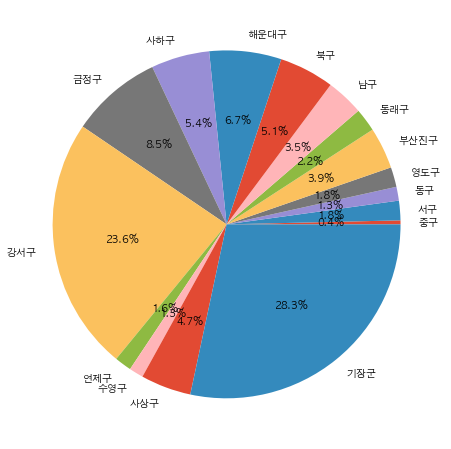

In [21]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
plt.pie(busan['면적(km²)'], labels=busan['구군'], autopct='%.1f%%')
plt.savefig('./images/pie_면적.png')
plt.show()

In [30]:
def busan_bar(x_value):
    x_label = x_value
    x = busan[x_label]
    
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111)
    rects = plt.barh(busan.구군, x, height=0.6, color='#5093FF')

    for i, rect in enumerate(rects):
        ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(format(rect.get_width(),',')), ha='right', va='center', size=10, color='#FFFFFF')

    plt.ylabel('구군')
    plt.xlabel(x_label)
    plt.savefig('./images/bar_{}.png'.format(x_label.replace('/','_')))
    plt.show()

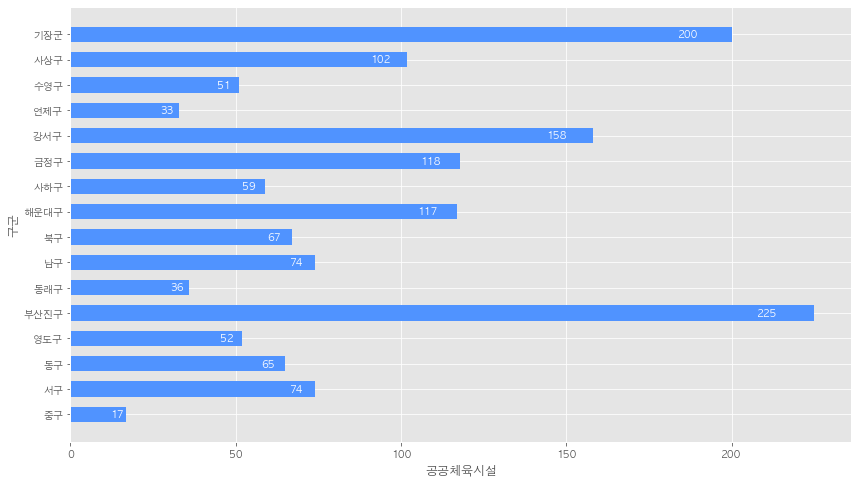

In [23]:
busan_bar('공공체육시설')

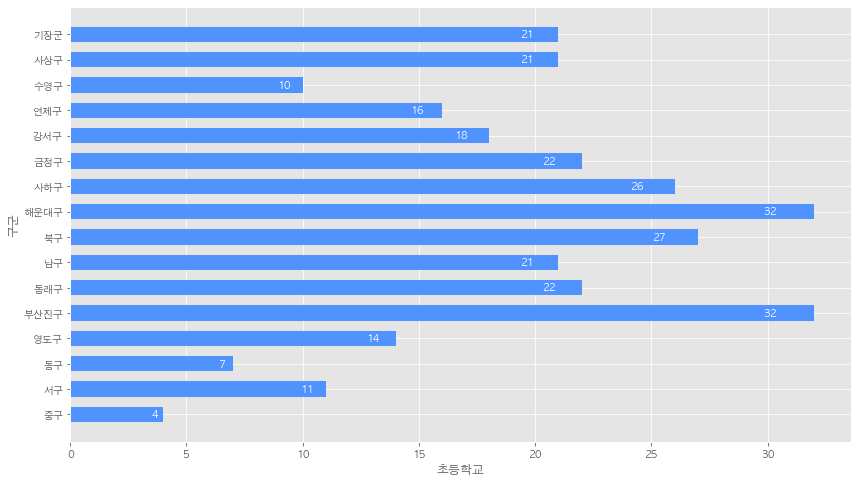

In [24]:
busan_bar('초등학교')

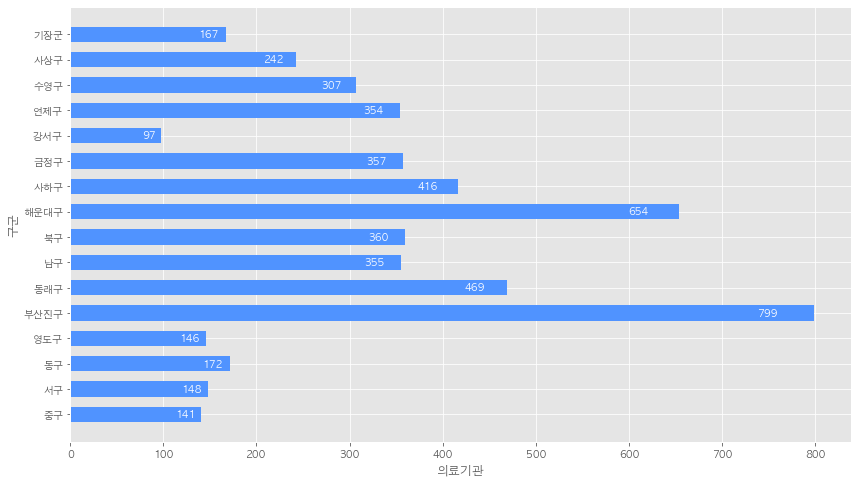

In [25]:
busan_bar('의료기관')

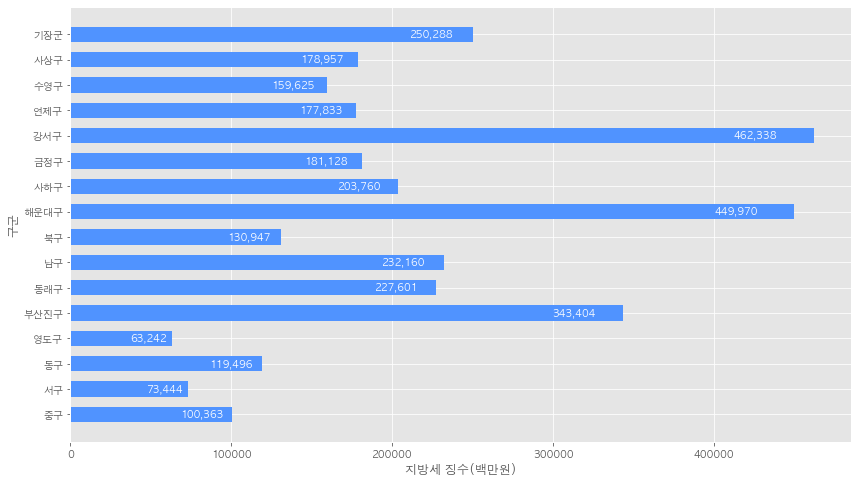

In [26]:
busan_bar('지방세 징수(백만원)')

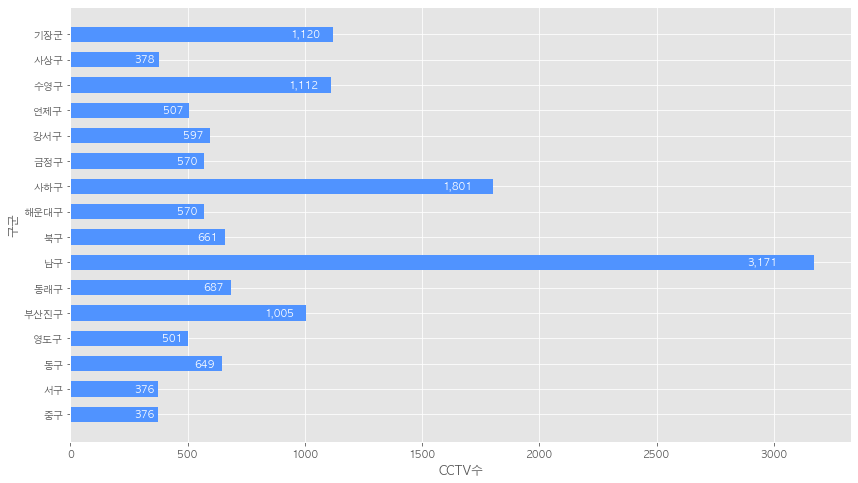

In [27]:
busan_bar('CCTV수')

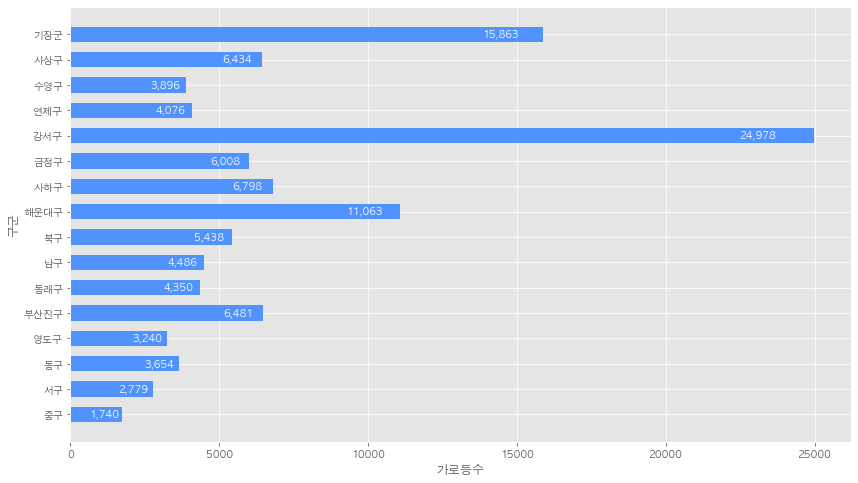

In [28]:
busan_bar('가로등수')

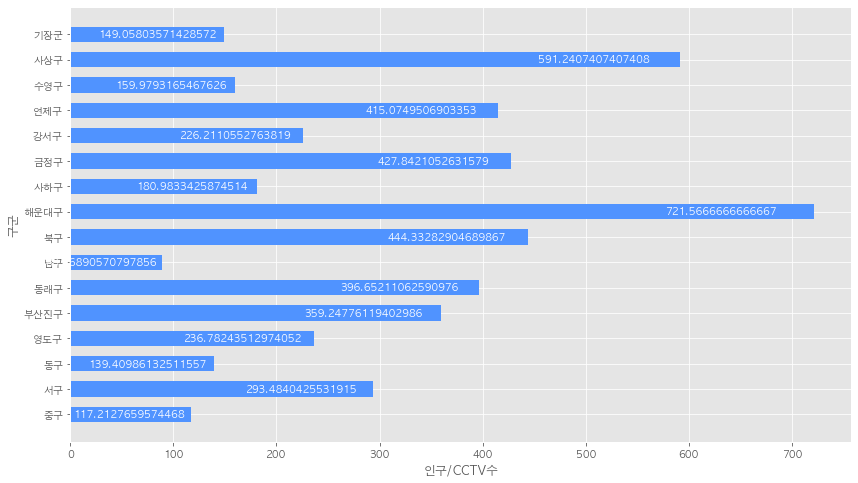

In [31]:
busan_bar('인구/CCTV수')

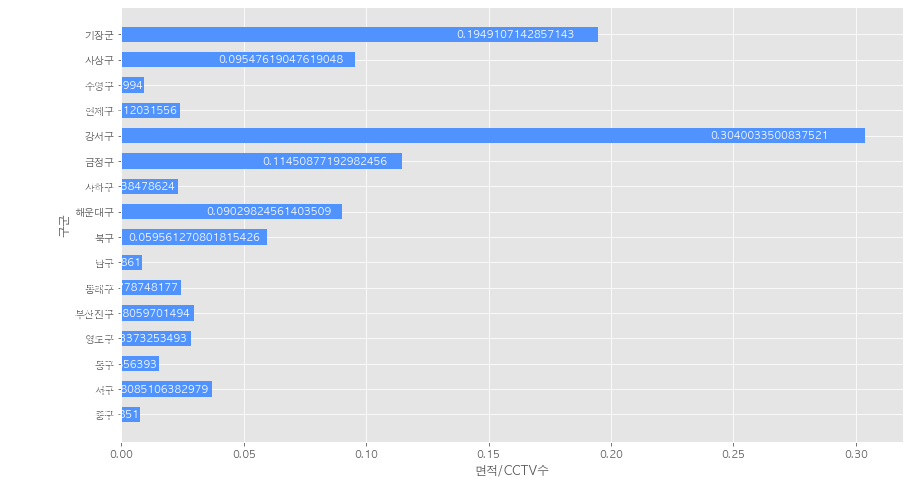

In [32]:
busan_bar('면적/CCTV수')

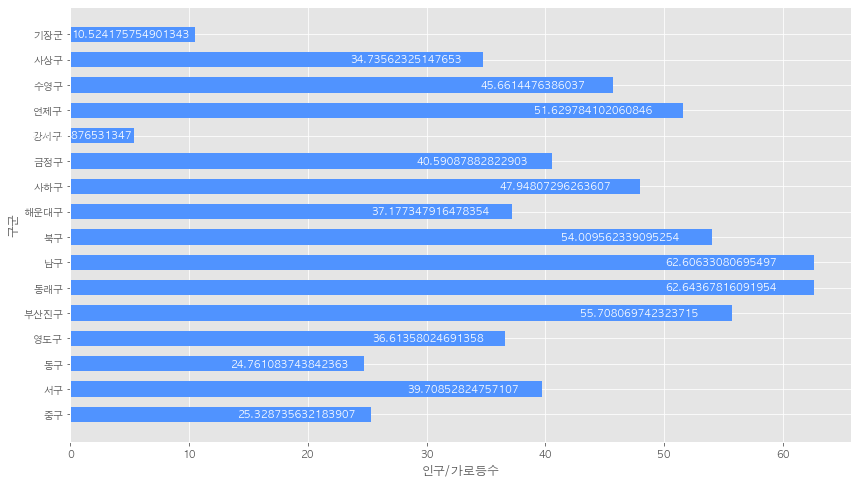

In [33]:
busan_bar('인구/가로등수')

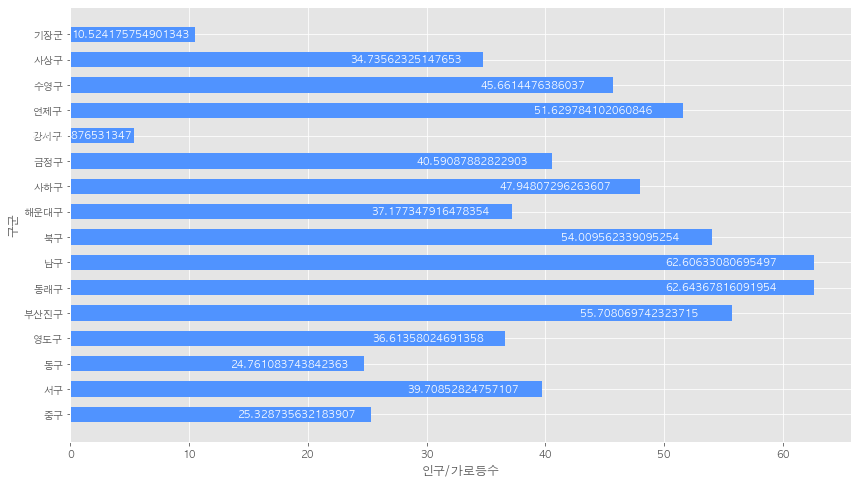

In [36]:
busan_bar('인구/가로등수')

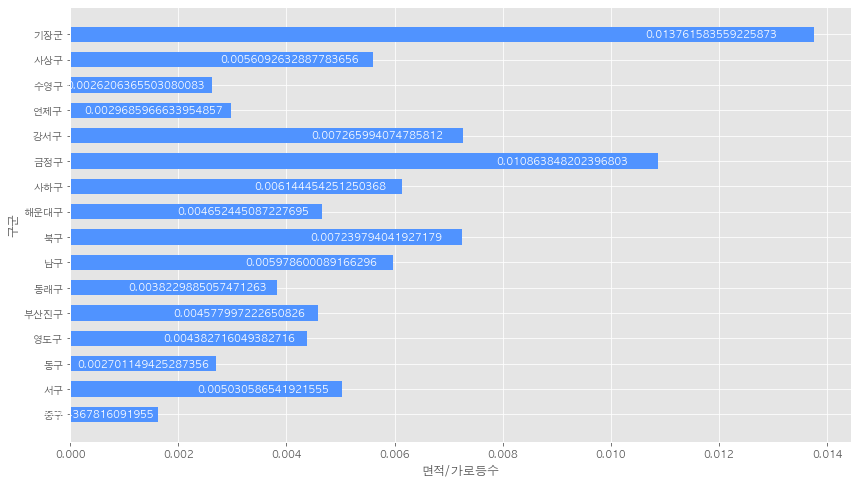

In [61]:
busan_bar('면적/가로등수')

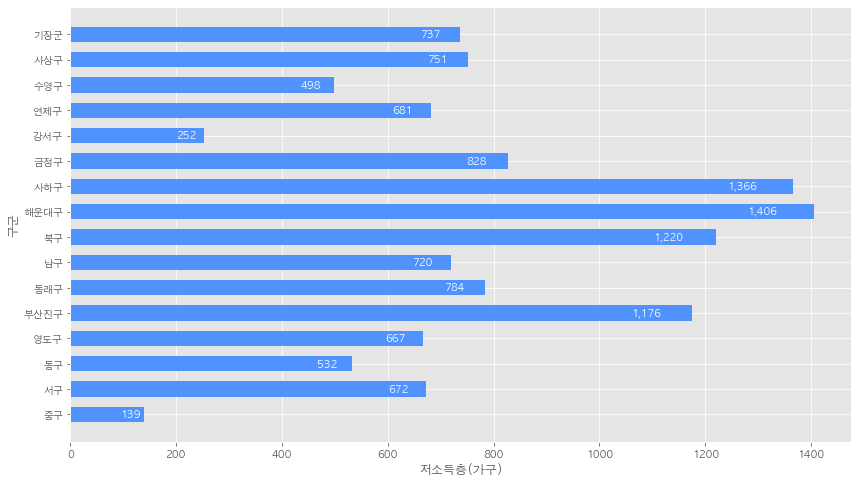

In [37]:
busan_bar('저소득층(가구)')

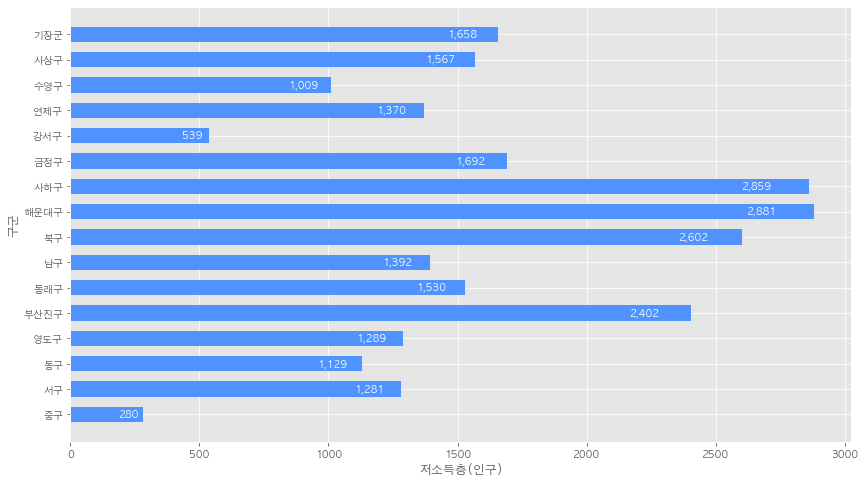

In [38]:
busan_bar('저소득층(인구)')

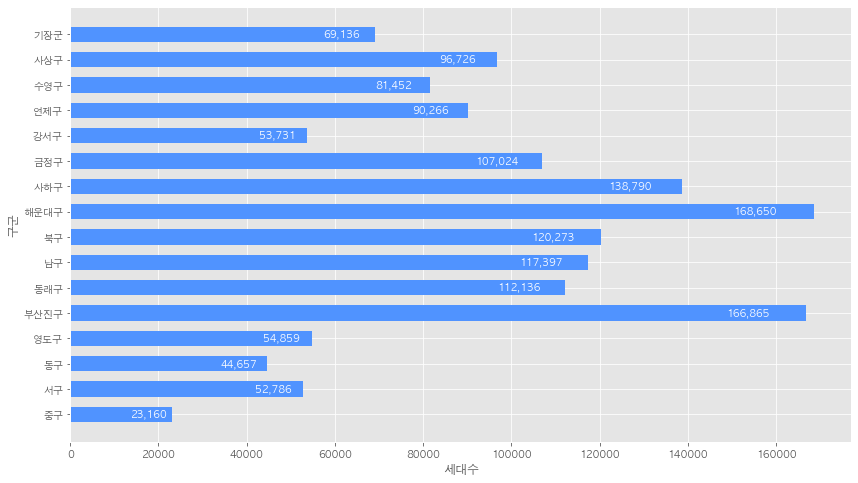

In [39]:
busan_bar('세대수')

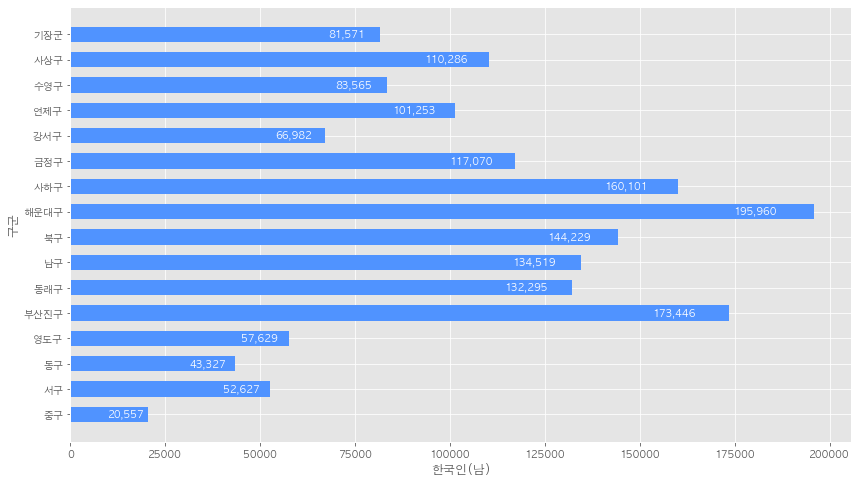

In [40]:
busan_bar('한국인(남)')

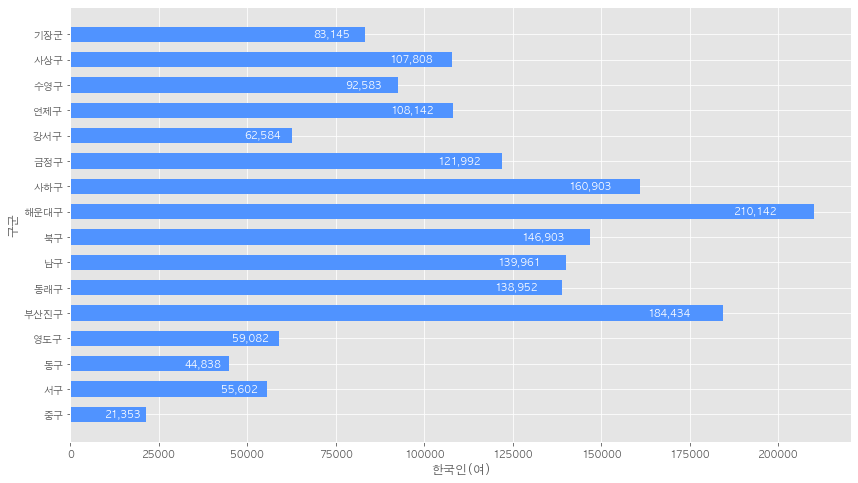

In [41]:
busan_bar('한국인(여)')

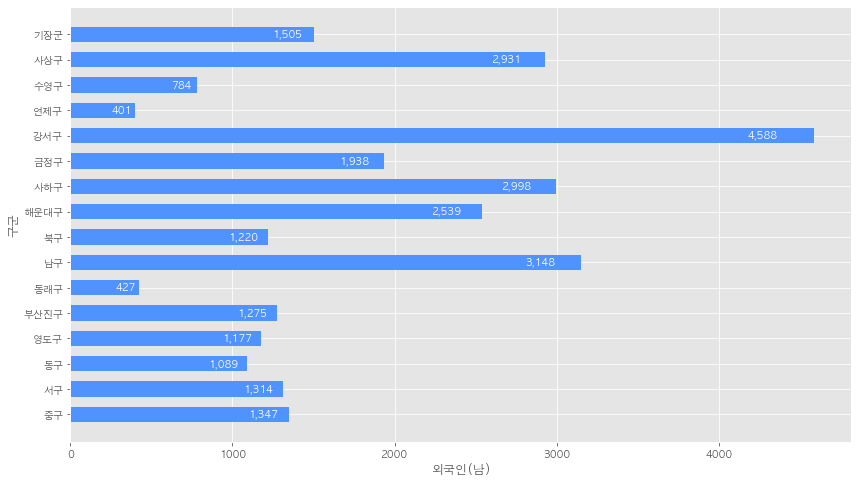

In [42]:
busan_bar('외국인(남)')

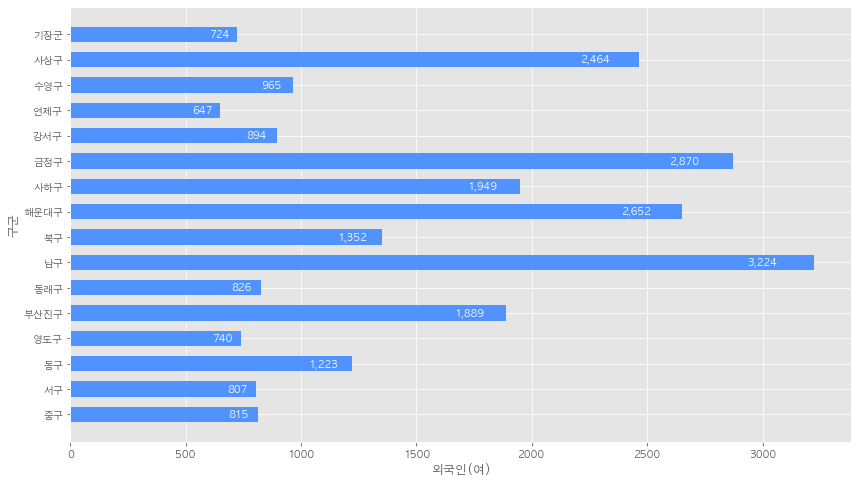

In [43]:
busan_bar('외국인(여)')

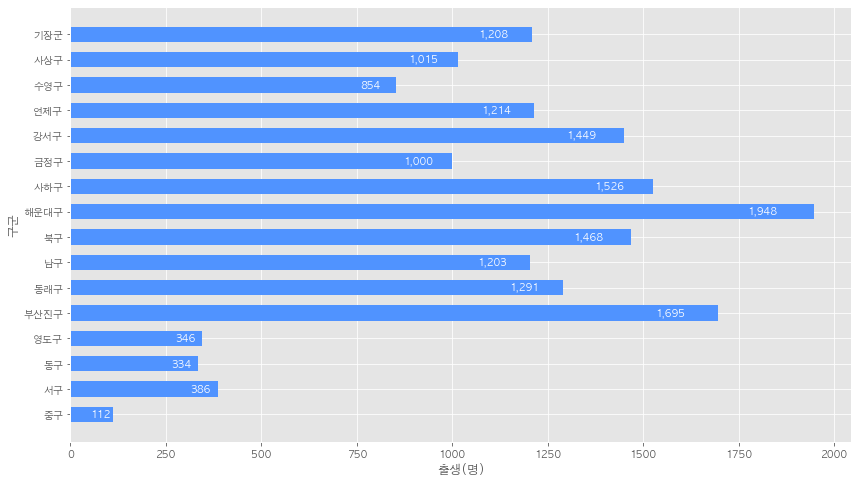

In [44]:
busan_bar('출생(명)')

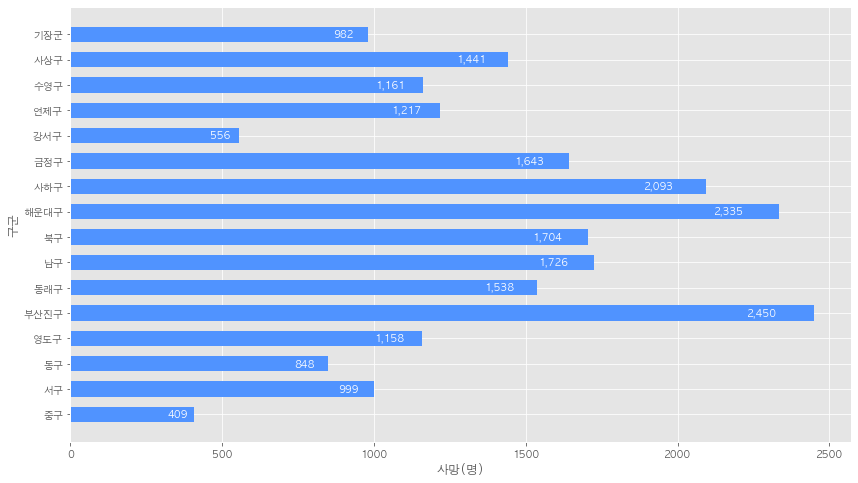

In [45]:
busan_bar('사망(명)')

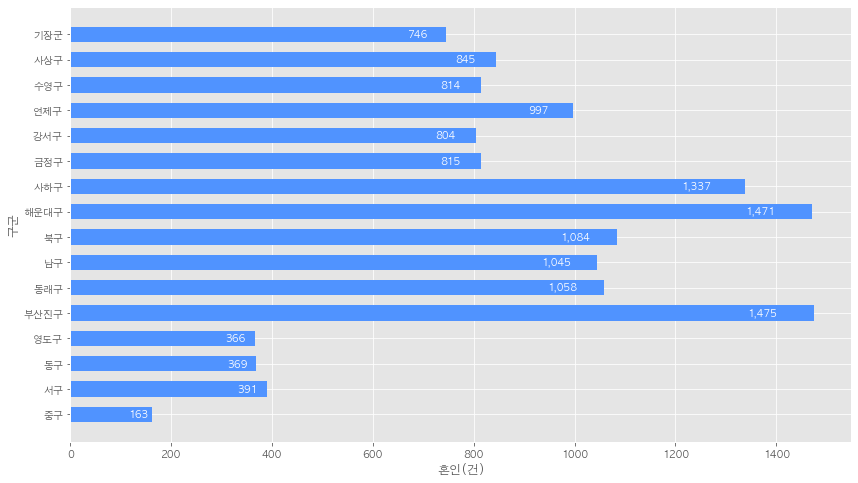

In [46]:
busan_bar('혼인(건)')

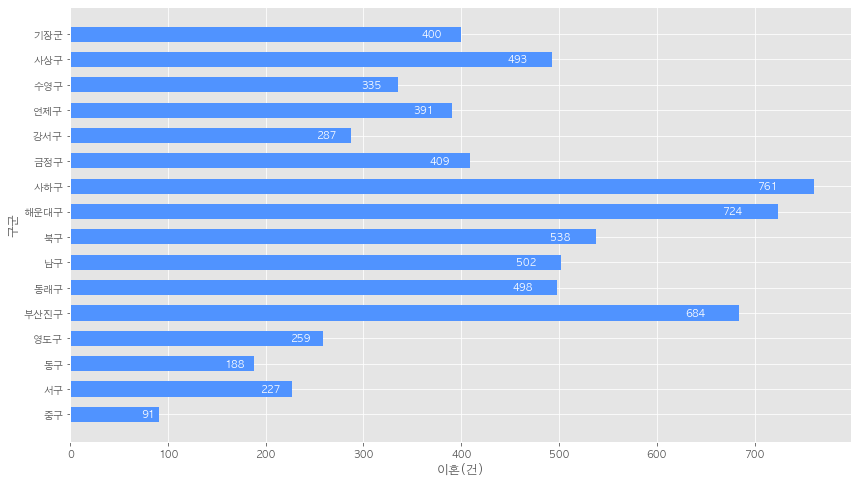

In [47]:
busan_bar('이혼(건)')

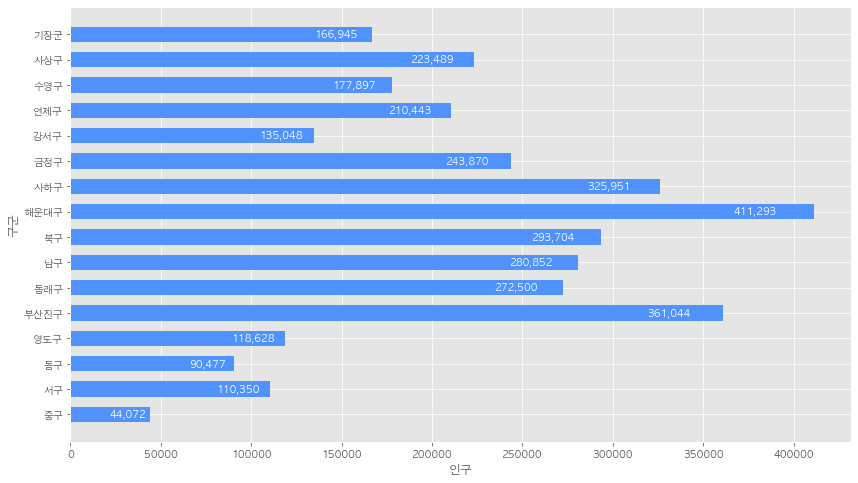

In [68]:
busan_bar('인구')

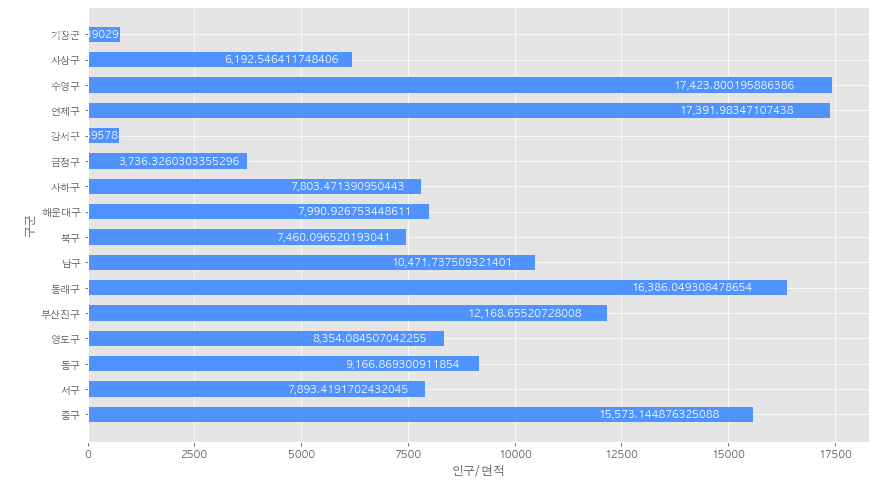

In [50]:
busan_bar('인구/면적')

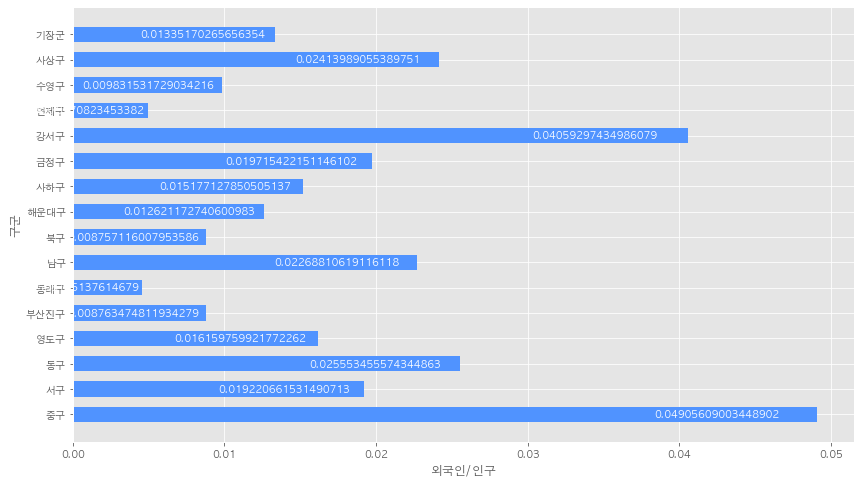

In [51]:
busan_bar('외국인/인구')

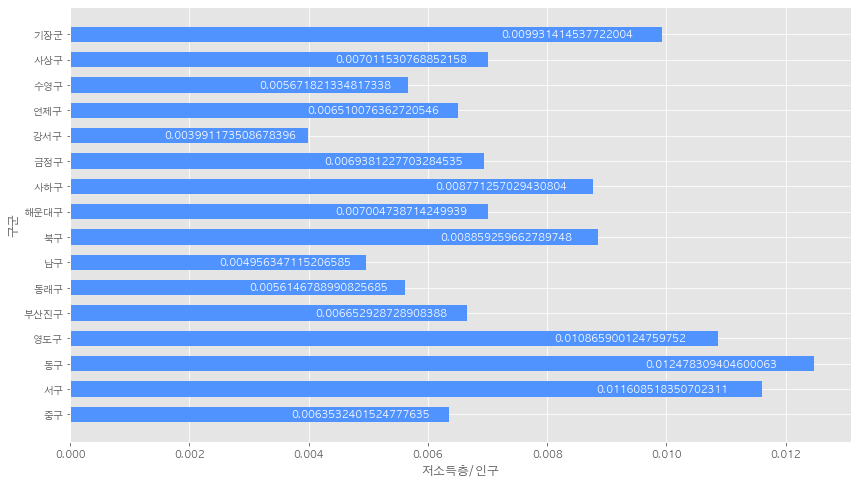

In [52]:
busan_bar('저소득층/인구')

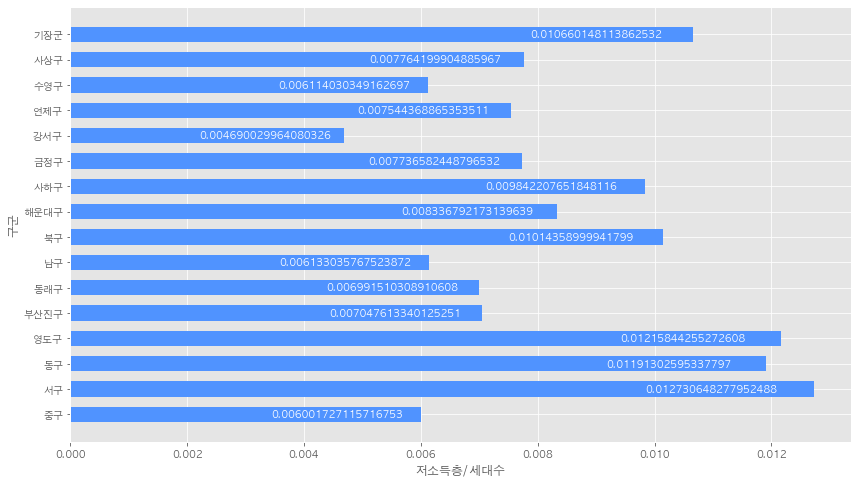

In [53]:
busan_bar('저소득층/세대수')

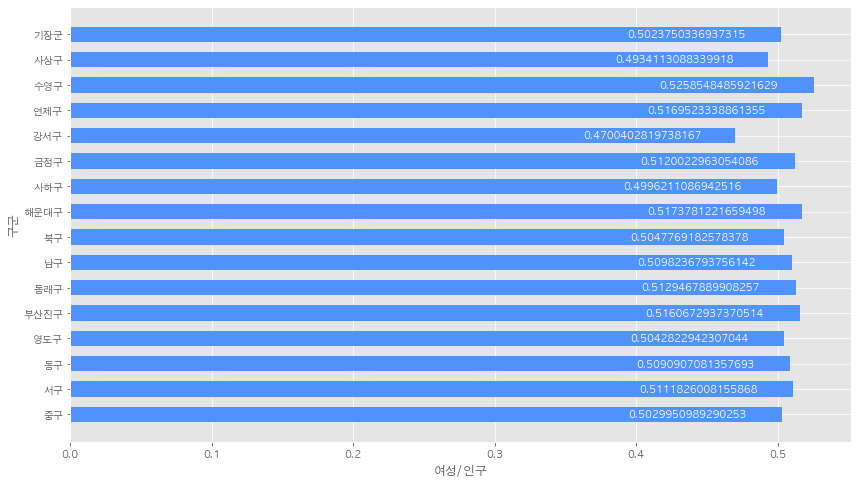

In [54]:
busan_bar('여성/인구')

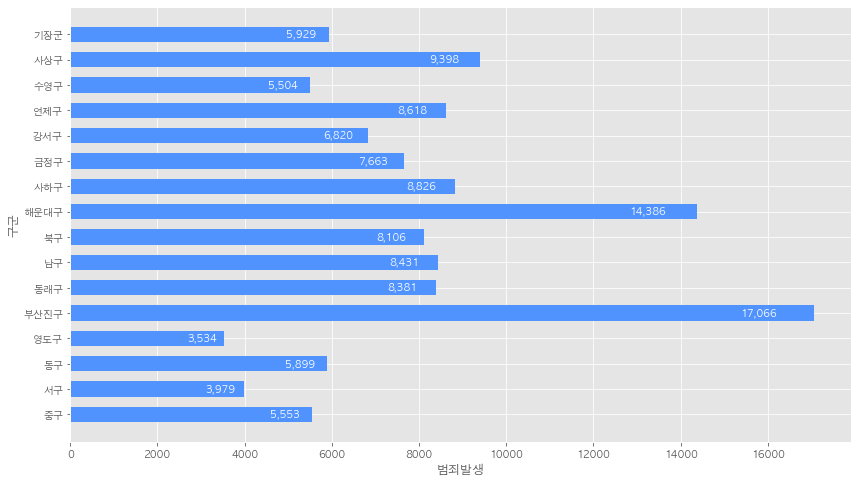

In [55]:
busan_bar('범죄발생')

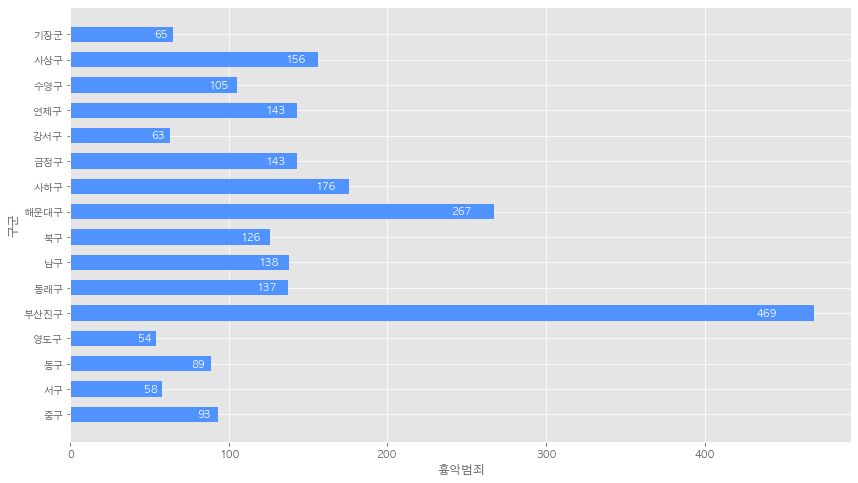

In [56]:
busan_bar('흉악범죄')

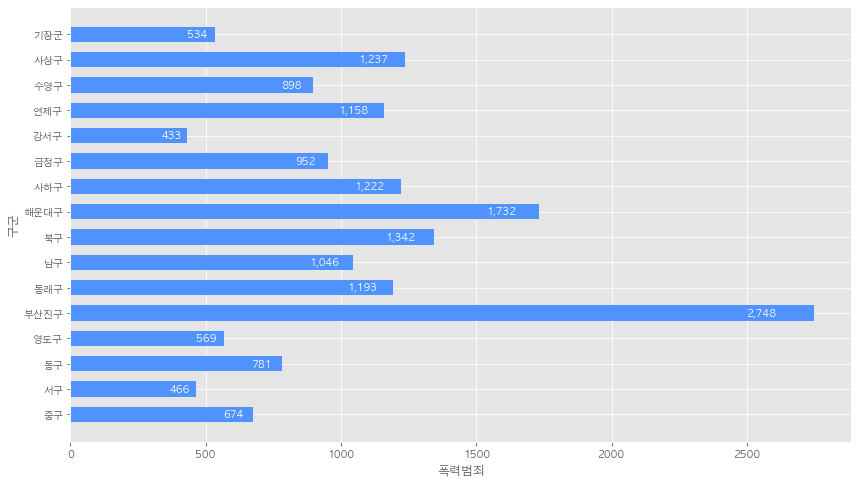

In [57]:
busan_bar('폭력범죄')

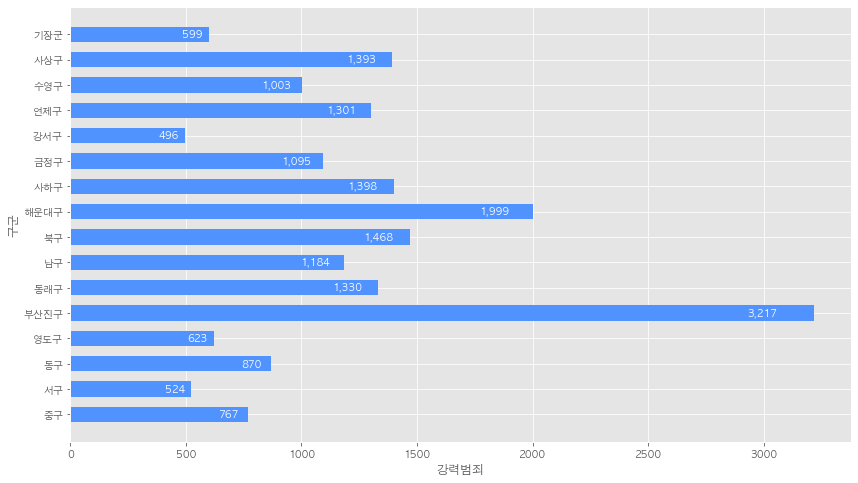

In [58]:
busan_bar('강력범죄')

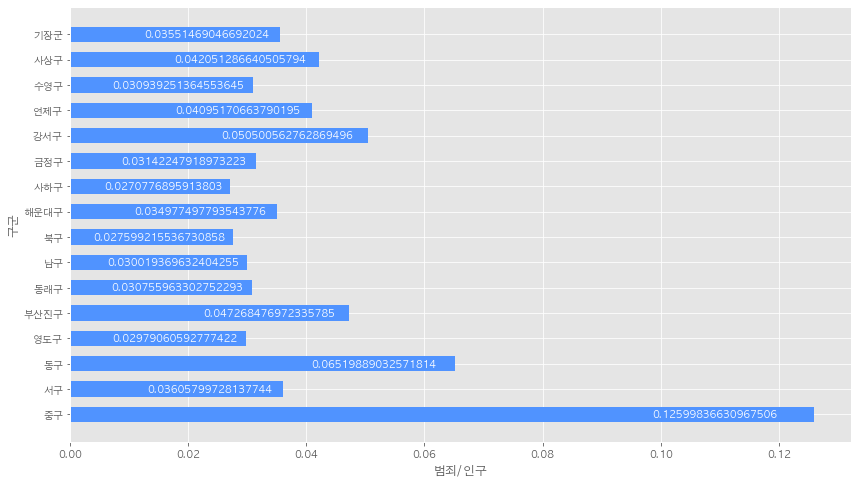

In [59]:
busan_bar('범죄/인구')

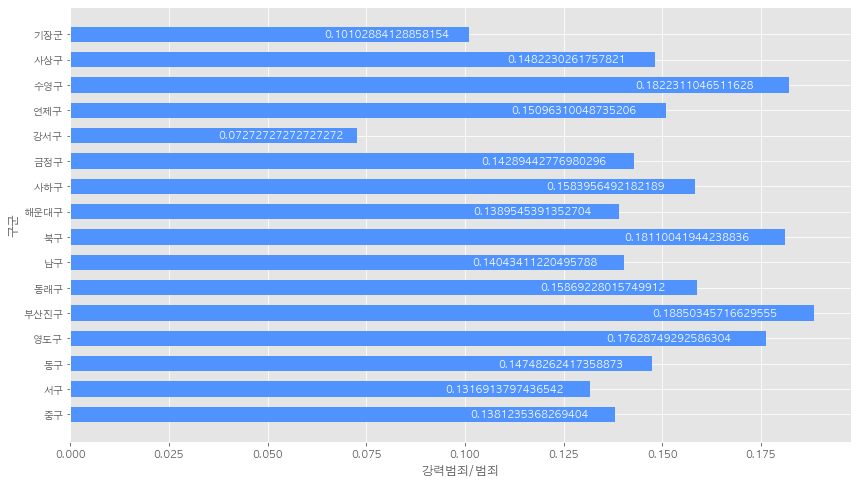

In [60]:
busan_bar('강력범죄/범죄')